# Intro to Python
## Assignment 2: NumPy/Pandas

**Date:** July 9 – July 15, 2021<br>
**Programmer:** *Rahim Hashim* <br>

***
To start, download the `IMDb movies.csv` from the following link: [Kaggle](https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset). If you remember from the lesson, you can drag the file directly from your Downloads folder into the Google Colab Files panel on the left, or use the upload button (see: [example](https://youtu.be/6HFlwqK3oeo?t=169)). For more ways to upload files, see [Colab External Data Management](https://colab.research.google.com/notebooks/io.ipynb).

### 1. Import the data into a Pandas DataFrame

In [8]:
import pandas as pd

# using the pandas csv-reader function from class
imdb_df = pd.read_csv('IMDb movies.csv') # <- fill in here

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


You might have gotten an error. Don't worry! In some cases, using the `engine=python` argument in `pd.read_csv()` makes it easier to parse .csv files with unfamiliar characters and inconsistent formatting.

In [ ]:
import pandas as pd
# repeat using pandas csv-reader with engine='python'
imdb_df = pd.read_csv('IMDb movies.csv', engine='python') # no error

In [9]:
imdb_df # uncomment one the variable has been assigned to see the DataFrame

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,"Alexandre Coquelle, Matthieu Le Naour",Monkey Pack Films,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,$ 3507171,NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,"Radek Bajgar, Herman Finkers",Johan Nijenhuis & Co,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,$ 7299062,NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",RMCC Productions,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim Uçkan",Gizem Ajans,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,$ 2833,NaN,NaN,NaN


### 2. Accessing data values from columns

In class, similarly to accessing data in Python Dictionaries e.g. `{key: value}`, we learned how to take all the values from a specific DataFrame column. As a reminder, we use the same `[]` to index as lists, but instead of providing an `int` value e.g. `list[0]`, we use `str`. 

With this, access the 'year' column, and use the `.unique()` method to see the unique years that these movies are from.

In [11]:
imdb_df['year'].unique()

array([1894, 1906, 1911, 1912, 1919, 1913, 1914, 1915, 1916, 1917, 1918,
       1920, 1921, 1924, 1922, 1923, 1925, 1926, 1935, 1927, 1928, 1983,
       1929, 1930, 1932, 1931, 1937, 1938, 1933, 1934, 1936, 1940, 1939,
       1942, 1943, 1941, 1948, 1944, 2001, 1946, 1945, 1947, 1973, 1949,
       1950, 1952, 1951, 1962, 1953, 1954, 1955, 1961, 1956, 1958, 1957,
       1959, 1960, 1963, 1965, 1971, 1964, 1966, 1968, 1967, 1969, 1976,
       1970, 1979, 1972, 1981, 1978, 2000, 1989, 1975, 1974, 1986, 1990,
       2018, 1977, 1982, 1980, 1993, 1984, 1985, 1988, 1987, 2005, 1991,
       2002, 1994, 1992, 1995, 2017, 1997, 1996, 2006, 1999, 1998, 2007,
       2008, 2003, 2004, 2010, 2009, 2011, 2013, 2012, 2016, 2015, 2014,
       2019, 2020, '2012', '2015', '2009', '2013', '2018', '2014', '2017',
       '2011', '2016', '1981', '1975', '2010', '1984', '2007', '2006',
       '2001', '2004', '1979', '2019', '1967', '1978', '2003', '2005',
       '1969', '1990', '1983', '2002', '1996', '2008'

In [13]:
imdb_df[imdb_df['year'] == '1963']

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
73162,tt3918808,Deya Neya,Deya Neya,1963,1963,Drama,107,India,Bengali,Sunil Bannerjee,Bidhayak Bhattacharya,Angel Digital Private Limited,"Uttam Kumar, Tanuja, Ratan Banerjee, Sudhir Ba...",The son of a wealthy industrialist aspires to ...,7.9,258,NaN,NaN,NaN,NaN,NaN,NaN
80657,tt6485574,Xiao bing zhang ga,Xiao bing zhang ga,1963,1963,"Drama, War",101,China,Mandarin,"Wei Cui, Hongying Ouyang",NaN,Beijing Film Studio,"Jisi An, Cunzhuang Ge",Zhang Ga was a naughty boy who wanted to join ...,6.5,117,NaN,NaN,NaN,NaN,NaN,NaN


Do the same thing now for the 'country' column. 

In [14]:
imdb_df['country'].unique()

array(['USA', 'Australia', 'Germany, Denmark', ...,
       'Iran, France, Germany, Switzerland, Luxembourg, Lebanon',
       'Spain, Portugal, Argentina', 'India, Netherlands, Singapore'],
      dtype=object)

Now, using the DataFrame filter syntax, select all movies from the country Italy

### 3. DataFrame filtering and plotting

In [15]:
country_selected = 'Italy'

italy_df = imdb_df[imdb_df['country'] == country_selected] # get all rows in which 'country' == 'Italy'
italy_df

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
7,tt0002445,Quo Vadis?,Quo Vadis?,1913,1913-03-01,"Drama, History",120,Italy,Italian,Enrico Guazzoni,"Henryk Sienkiewicz, Enrico Guazzoni",Società Italiana Cines,"Amleto Novelli, Gustavo Serena, Carlo Cattaneo...","An epic Italian film ""Quo Vadis"" influenced ma...",6.2,273,ITL 45000,NaN,NaN,NaN,7.0,5.0
14,tt0003102,Ma l'amor mio non muore...,Ma l'amor mio non muore...,1914,1914-01-01,Drama,90,Italy,Italian,Mario Caserini,"Emiliano Bonetti, G. Monleone",Film Artistica Gloria,"Lyda Borelli, Mario Bonnard, Gian Paolo Rosmin...","Leslie Swayne, an adventurer, in order to obta...",6.2,100,NaN,NaN,NaN,NaN,NaN,4.0
20,tt0003489,Gli ultimi giorni di Pompei,Gli ultimi giorni di Pompei,1913,1913-08-24,"Adventure, Drama",88,Italy,Italian,"Mario Caserini, Eleuterio Rodolfi","Edward George Bulwer-Lytton, Mario Caserini",Società Anonima Ambrosio,"Fernanda Negri Pouget, Eugenia Tettoni Fior, U...",Two love triangles intersect in ancient Pompei.,6.2,474,NaN,NaN,NaN,NaN,13.0,7.0
21,tt0003637,Assunta Spina,Assunta Spina,1915,1916-05-01,Drama,72,Italy,NaN,"Francesca Bertini, Gustavo Serena","Salvatore Di Giacomo, Francesca Bertini",Caesar Film,"Francesca Bertini, Gustavo Serena, Carlo Benet...",Assunta Spina is a tragedy set in Naples at th...,6.4,378,NaN,NaN,NaN,NaN,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85615,tt9625240,Nevia,Nevia,2019,2019-09-05,Drama,86,Italy,Italian,Nunzia De Stefano,"Nunzia De Stefano, Chiara Ridolfi",Archimede,"Virginia Apicella, Pietra Montecorvino, Rosy F...","Nevia, a Neapolitan girl that comes from a poo...",5.7,131,NaN,NaN,NaN,NaN,NaN,7.0
85632,tt9639274,Bangla,Bangla,2019,2019-05-16,Comedy,84,Italy,"Italian, Bengali",Phaim Bhuiyan,"Phaim Bhuiyan, Vanessa Picciarelli",Fandango,"Phaim Bhuiyan, Carlotta Antonelli, Simone Libe...","It's about an Italian young man, whose parents...",5.6,657,NaN,NaN,$ 211568,NaN,3.0,10.0
85739,tt9778888,Il sindaco del Rione Sanità,Il sindaco del Rione Sanità,2019,2019-09-30,"Crime, Drama",115,Italy,Italian,Mario Martone,"Eduardo De Filippo, Mario Martone",Indigo Film,"Francesco Di Leva, Adriano Pantaleo, Roberto D...",This particular version of Naples is home to A...,5.1,450,NaN,NaN,$ 465257,NaN,3.0,16.0
85796,tt9840382,Se mi vuoi bene,Se mi vuoi bene,2019,2019-10-17,Comedy,100,Italy,Italian,Fausto Brizzi,"Fausto Brizzi, Martino Coli",Eliseo Cinema,"Claudio Bisio, Sergio Rubini, Dino Abbrescia, ...",A man with a knack for accidentally setting of...,5.5,101,NaN,NaN,$ 976473,NaN,NaN,6.0


What is the average duration for all rows included above? 

Hint: in order to use mathematical operations on values, they must be either of type `int` or `float`

In [16]:
import numpy as np
np.mean(italy_df['duration'])

98.03600654664484

There's one method that comes very handy in pandas, which is `.groupby()`. As a reminder, it is always helpful to have the documentation open for the libraries you are using while you code: [DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). Use `.groupby()` to group the rows by the 'country' column.

In [ ]:
imdb_df_grouped = imdb_df.groupby('country')
imdb_df_grouped.head(10)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85798,tt9843470,La isla de las mentiras,La isla de las mentiras,2020,2020-05-14,Drama,93,"Spain, Portugal, Argentina",Spanish,Paula Cons,"Paula Cons, Luis Marías",Agallas Films,"Nerea Barros, Darío Grandinetti, Aitor Luna, V...","In the early morning of January 2, 1921, amid ...",5.7,112,NaN,NaN,NaN,NaN,NaN,7.0
85804,tt9850050,Charter,Charter,2020,2020-03-13,Drama,94,"Sweden, Norway, Denmark","Swedish, English, Spanish",Amanda Kernell,Amanda Kernell,Det Danske Filminstitut,"Ane Dahl Torp, Sverrir Gudnason, Troy Lundkvis...","After a divorce, Alice hasn't seen her childre...",6.5,244,NaN,NaN,NaN,NaN,2.0,10.0
85806,tt9850264,Bruno Manser - Die Stimme des Regenwaldes,Bruno Manser - Die Stimme des Regenwaldes,2019,2020-10-22,"Adventure, Biography, Drama",142,"Switzerland, Austria","English, Swiss German, German",Niklaus Hilber,"David Clemens, Niklaus Hilber",A Film Company,"Sven Schelker, Charlotte Heinimann, Daniel Lud...",1984: Searching for an experience that goes de...,7.6,229,NaN,NaN,NaN,NaN,4.0,4.0
85825,tt9880982,Dulce Familia,Dulce Familia,2019,2019-05-10,Comedy,101,"Mexico, Chile",Spanish,Nicolás López,"Guillermo Amoedo, Coca Gómez",Bh5,"Paz Bascuñán, Regina Blandón, Fernanda Castill...",A successful pastry chef gets engaged to be ma...,4.5,251,NaN,NaN,$ 5725043,NaN,2.0,1.0


In [ ]:
list(imdb_df_grouped['country'])

[('Afghanistan, France', 46017    Afghanistan, France
  67774    Afghanistan, France
  Name: country, dtype: object),
 ('Afghanistan, France, Germany, UK', 60269    Afghanistan, France, Germany, UK
  Name: country, dtype: object),
 ('Afghanistan, Iran', 71561    Afghanistan, Iran
  78564    Afghanistan, Iran
  85123    Afghanistan, Iran
  Name: country, dtype: object),
 ('Afghanistan, Ireland, Japan, Iran, Netherlands',
  43796    Afghanistan, Ireland, Japan, Iran, Netherlands
  Name: country, dtype: object),
 ('Albania', 23447    Albania
  34326    Albania
  34395    Albania
  34489    Albania
  40867    Albania
  52376    Albania
  54722    Albania
  74325    Albania
  77692    Albania
  81768    Albania
  82728    Albania
  Name: country, dtype: object),
 ('Albania, Austria, France', 58911    Albania, Austria, France
  Name: country, dtype: object),
 ('Albania, Czech Republic, Greece', 49234    Albania, Czech Republic, Greece
  Name: country, dtype: object),
 ('Albania, Greece, Fran

In [ ]:
imdb_df_grouped.mean().index

Index(['Afghanistan, France', 'Afghanistan, France, Germany, UK',
       'Afghanistan, Iran', 'Afghanistan, Ireland, Japan, Iran, Netherlands',
       'Albania', 'Albania, Austria, France',
       'Albania, Czech Republic, Greece', 'Albania, Greece, France',
       'Albania, Italy, Kosovo', 'Albania, Romania, Greece, France',
       ...
       'Yugoslavia, Hungary, Austria, West Germany', 'Yugoslavia, Italy',
       'Yugoslavia, Italy, France, USA',
       'Yugoslavia, Italy, West Germany, USA', 'Yugoslavia, UK',
       'Yugoslavia, USA', 'Yugoslavia, USA, Liechtenstein',
       'Yugoslavia, West Germany', 'Zambia, Sweden', 'Zimbabwe'],
      dtype='object', name='country', length=4907)

Now use the `df.plot()` function to plot all average duration for all the different countries. Feel free to try out the different types of plots, some of which are shown [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html). Which country had the longest average duration?

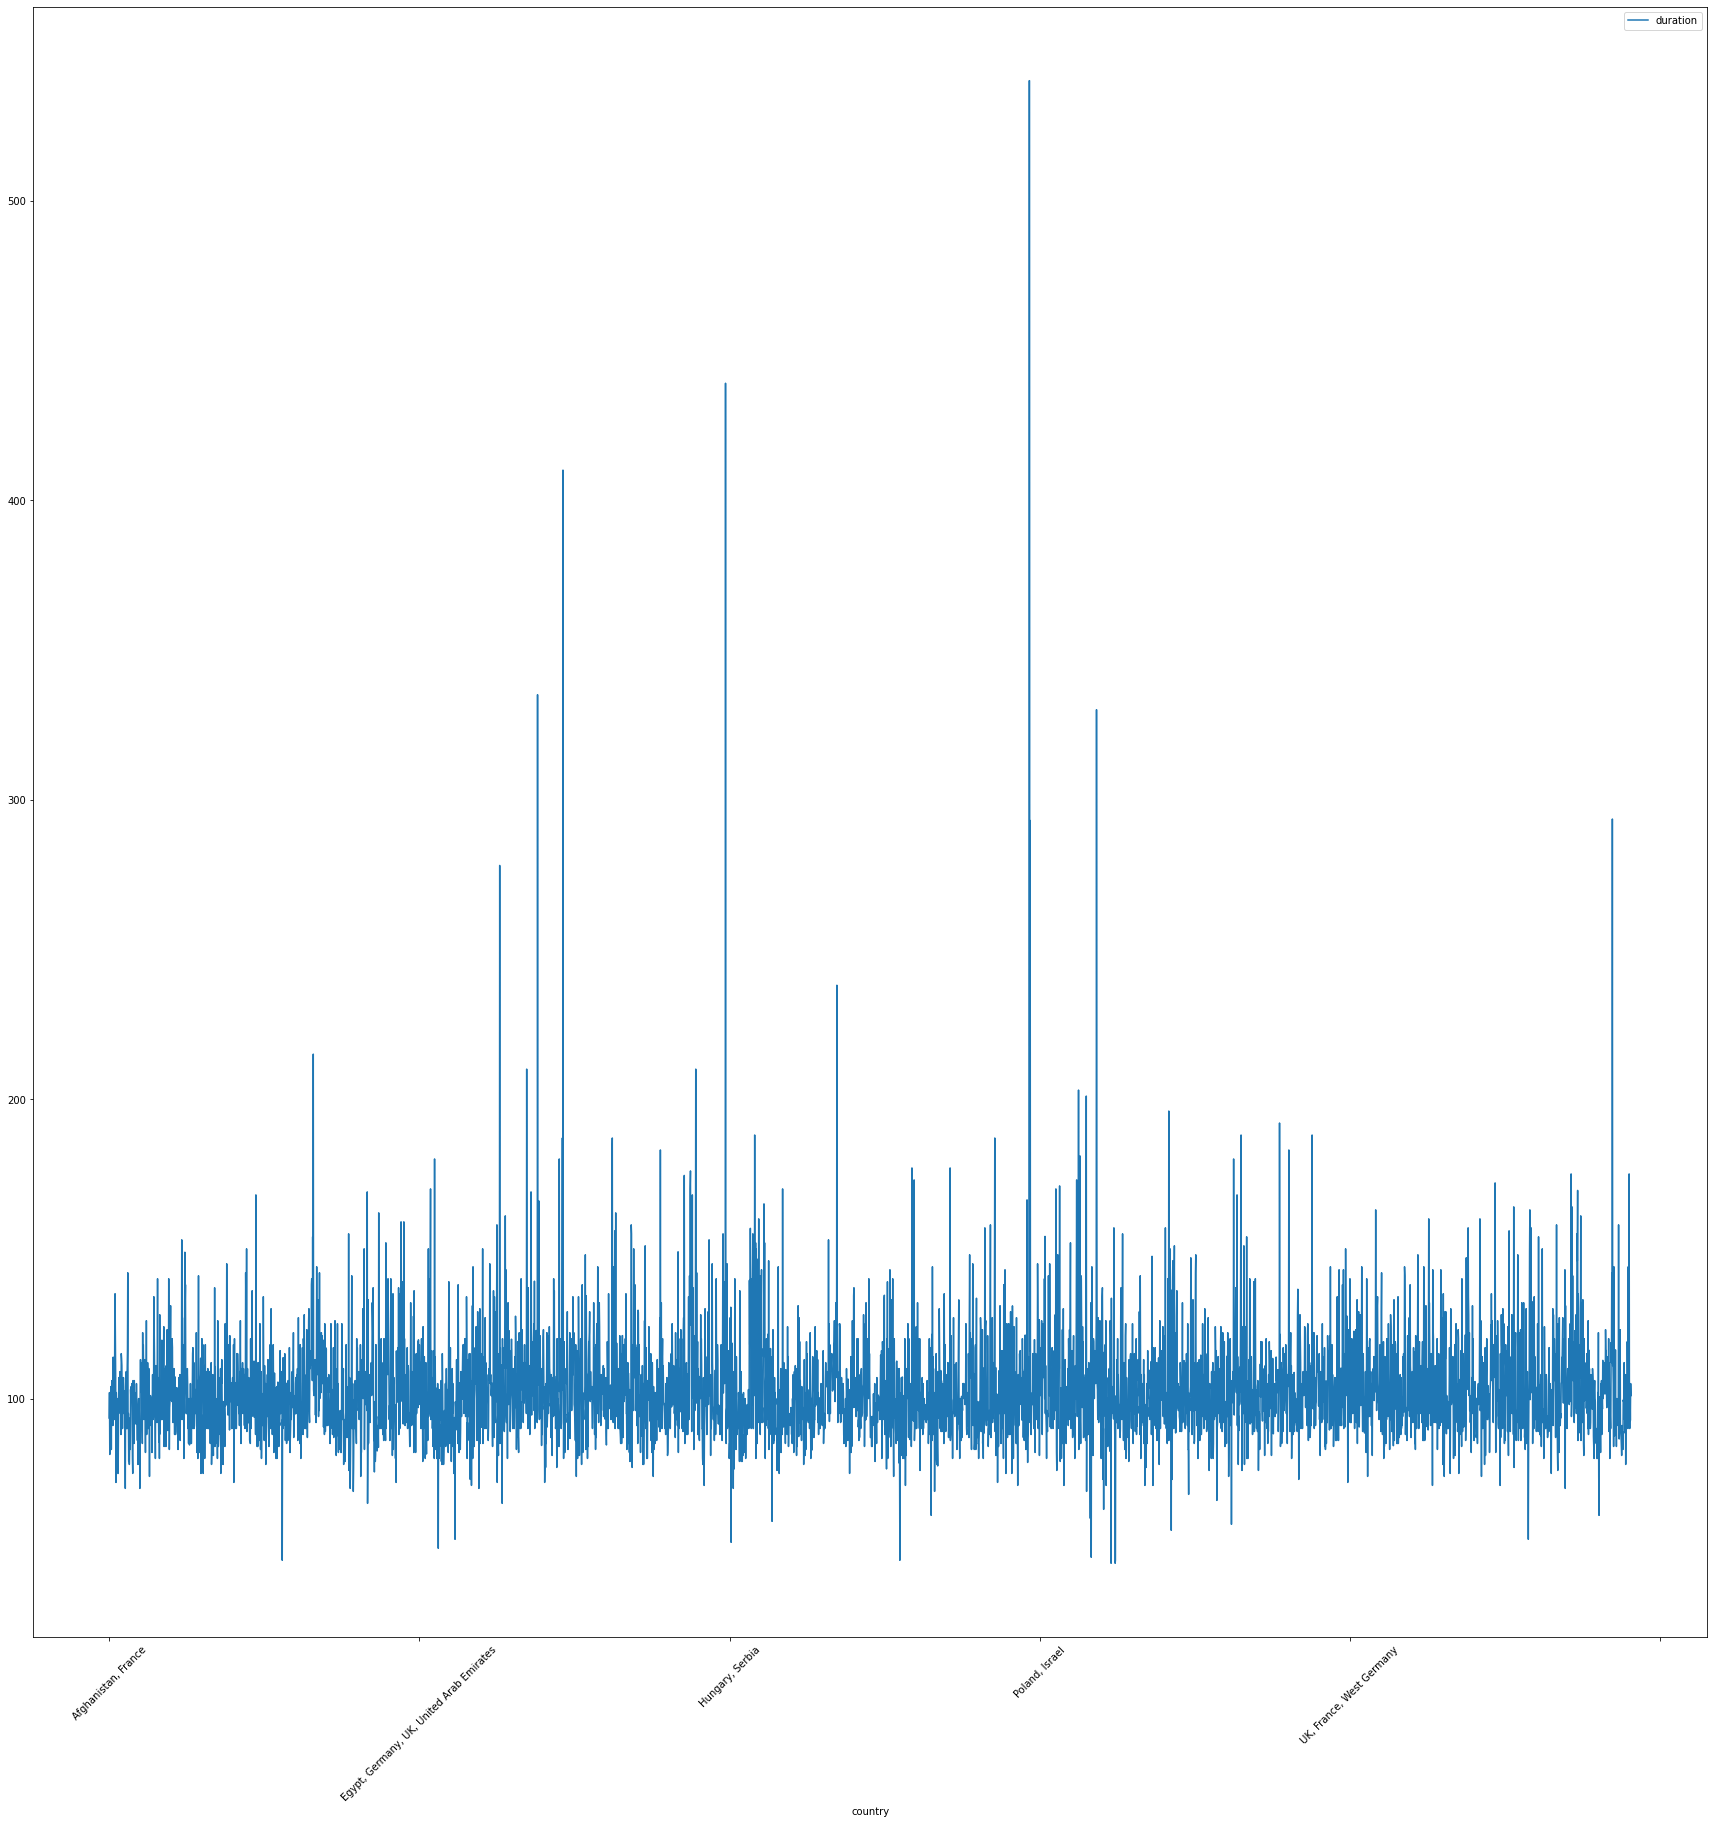

In [ ]:
imdb_df_grouped.mean().plot(y='duration', use_index=True, figsize=(30,30), rot=45)

In [ ]:
imdb_df_grouped.mean()[imdb_df_grouped.mean()['duration']==imdb_df_grouped.mean()['duration'].max()]

,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
country,,,,,,
"Philippines, Netherlands",540.0,7.4,165.0,NaN,2.0,8.0
"Philippines, Netherlands, Sweden",540.0,7.0,131.0,NaN,NaN,9.0
